In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



df = pd.read_csv(r'C:\Users\sayan\Downloads\movies.csv')


In [14]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


In [168]:
# Checking missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%
grosstotal - 99%
countrygrosstotal - 100%
Year - 0%


In [161]:
# Data Types for our columns

print(df.dtypes)

budget               float64
company               object
country               object
director              object
genre                 object
gross                float64
name                  object
rating                object
released              object
runtime                int64
score                float64
star                  object
votes                  int64
writer                object
year                   int64
grosstotal           float64
countrygrosstotal    float64
Year                  object
dtype: object


<AxesSubplot:>

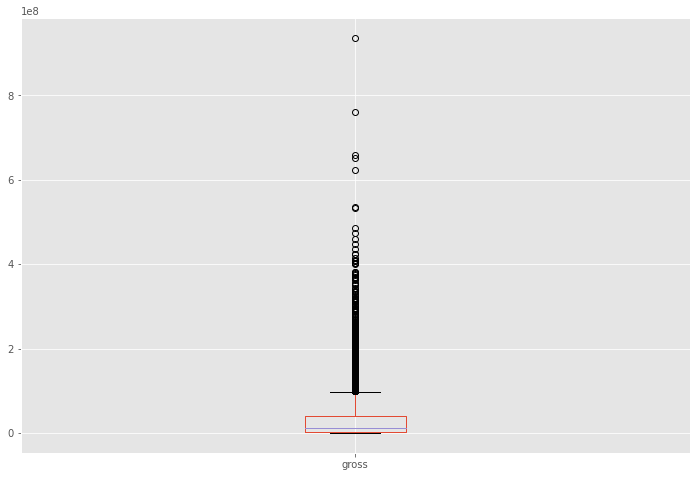

In [45]:
# Checking Outliers

df.boxplot(column=['gross'])

In [79]:
df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6819,0.0,Les Productions du Tr�sor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016
1871,0.0,Paramount Pictures,USA,Richard Benjamin,Comedy,18137661.0,Milk Money,PG-13,1994-08-31,110,5.5,Melanie Griffith,9880,John Mattson,1994
1852,0.0,Twentieth Century Fox Film Corporation,USA,Les Mayfield,Family,17193886.0,Miracle on 34th Street,PG,1994-11-18,114,6.4,Richard Attenborough,24126,Valentine Davies,1994
1854,0.0,Morgan Creek Productions,USA,Dennis Hopper,Comedy,1596700.0,Chasers,R,1994-04-22,102,5.0,Tom Berenger,4804,Joe Batteer,1994
1855,0.0,Renn Productions,France,Patrice Ch�reau,Biography,2017346.0,Queen Margot,R,1994-12-09,159,7.5,Isabelle Adjani,14377,Alexandre Dumas,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,Marvel Studios,USA,Joss Whedon,Action,459005868.0,Avengers: Age of Ultron,PG-13,2015-05-01,141,7.4,Robert Downey Jr.,537832,Joss Whedon,2015
6194,250000000.0,New Line Cinema,New Zealand,Peter Jackson,Adventure,255119788.0,The Hobbit: The Battle of the Five Armies,PG-13,2014-12-17,144,7.4,Ian McKellen,396797,Fran Walsh,2014
4637,258000000.0,Columbia Pictures,USA,Sam Raimi,Action,336530303.0,Spider-Man 3,PG-13,2007-05-04,139,6.2,Tobey Maguire,416842,Sam Raimi,2007
5293,260000000.0,Walt Disney Animation Studios,USA,Nathan Greno,Animation,200821936.0,Tangled,PG,2010-11-24,100,7.8,Mandy Moore,325621,Dan Fogelman,2010


In [42]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000.0,Lucasfilm,USA,J.J. Abrams,Action,936662225.0,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000.0,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625.0,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302.0,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000.0,Universal Pictures,USA,Colin Trevorrow,Action,652270625.0,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000.0,Marvel Studios,USA,Joss Whedon,Action,623357910.0,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0.0,Zentropa International Norway,Norway,Petter N�ss,Action,547.0,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012
5699,0.0,Isle of Man Film,UK,Sheree Folkson,Comedy,542.0,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011
6066,0.0,Cinetel Films,USA,Steven R. Monroe,Crime,441.0,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013
2594,15000000.0,Daybreak,USA,George Huang,Comedy,309.0,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997


<AxesSubplot:xlabel='gross', ylabel='budget'>

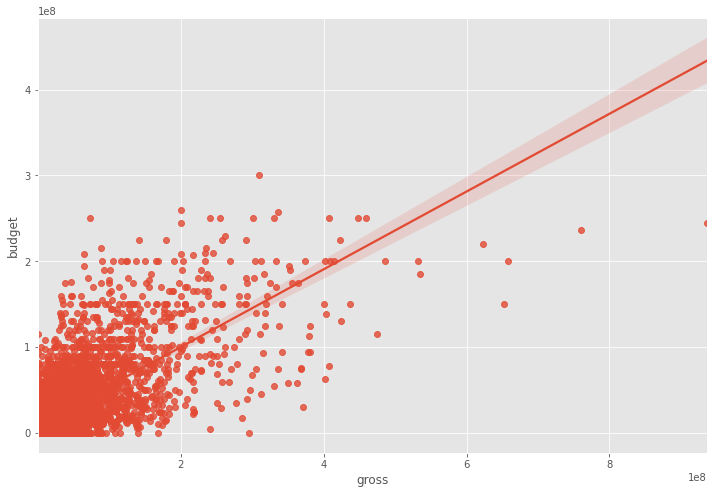

In [166]:
sns.regplot(x="gross", y="budget", data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

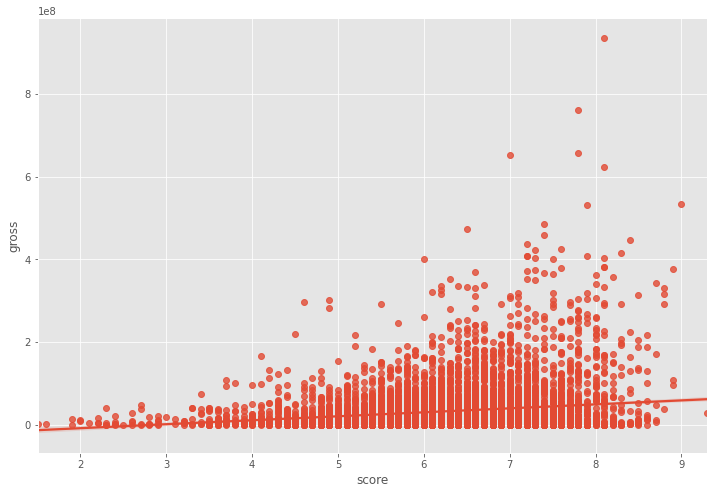

In [50]:
sns.regplot(x="score", y="gross", data=df)

In [60]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [61]:
df.corr(method ='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


In [170]:
df.corr(method ='spearman')

,budget,gross,runtime,score,votes,year,grosstotal,countrygrosstotal
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553,0.035936,NaN
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467,-0.076909,NaN
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902,-0.092817,NaN
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598,-0.083826,NaN
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588,-0.045118,NaN
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000,0.062077,NaN
grosstotal,0.035936,-0.076909,-0.092817,-0.083826,-0.045118,0.062077,1.000000,NaN
countrygrosstotal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


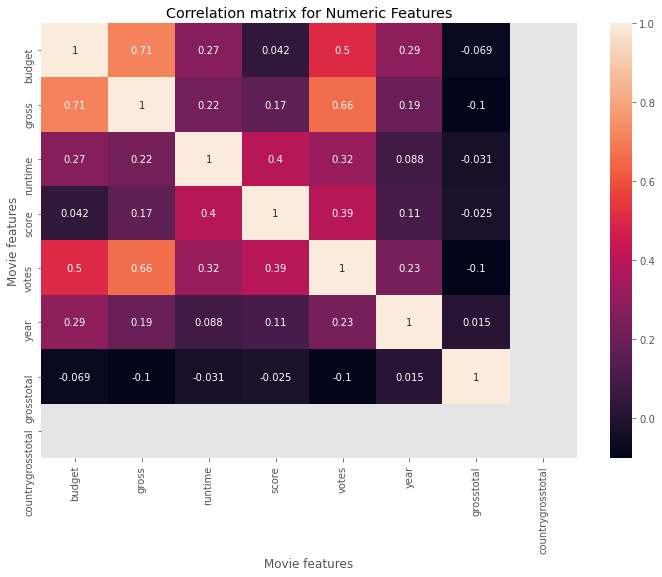

In [190]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [171]:
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
budget,1.000000,0.070302,-0.189282,0.480919,0.300018,0.978268,0.965431,-0.062005,0.370211,0.134315,0.009605,0.257396,0.955916,0.674068,-0.102399,0.020254,NaN,-0.099138
company,0.070302,1.000000,0.061540,0.155935,0.060236,0.101625,0.101876,0.000846,0.166275,-0.027840,0.031371,0.165490,0.089678,0.133796,0.105162,-0.008602,NaN,0.074285
country,-0.189282,0.061540,1.000000,-0.133631,-0.013013,-0.187801,-0.187762,0.124684,-0.051932,0.021056,0.012047,-0.054245,-0.181534,-0.146713,-0.004329,0.009149,NaN,-0.012557
director,0.480919,0.155935,-0.133631,1.000000,0.216499,0.507853,0.504802,-0.028938,0.292789,0.044193,0.036790,0.296325,0.497085,0.491595,0.030836,-0.009890,NaN,0.015255
genre,0.300018,0.060236,-0.013013,0.216499,1.000000,0.292627,0.288330,-0.024621,0.097809,0.031636,0.041309,0.098848,0.295037,0.230763,-0.003674,-0.017057,NaN,-0.003128
gross,0.978268,0.101625,-0.187801,0.507853,0.292627,1.000000,0.984267,-0.064561,0.422125,0.135257,0.013615,0.295385,0.974594,0.700464,-0.022809,0.019572,NaN,-0.026757
name,0.965431,0.101876,-0.187762,0.504802,0.288330,0.984267,1.000000,-0.065076,0.417623,0.130176,0.012255,0.292396,0.960618,0.695995,-0.023150,0.017110,NaN,-0.027272
rating,-0.062005,0.000846,0.124684,-0.028938,-0.024621,-0.064561,-0.065076,1.000000,-0.037900,0.035531,0.041838,0.000761,-0.060888,-0.056504,-0.013564,-0.010236,NaN,-0.020357
released,0.370211,0.166275,-0.051932,0.292789,0.097809,0.422125,0.417623,-0.037900,1.000000,0.070848,0.026386,0.211113,0.412720,0.315467,0.236153,-0.001076,NaN,0.225125
runtime,0.134315,-0.027840,0.021056,0.044193,0.031636,0.135257,0.130176,0.035531,0.070848,1.000000,0.054928,0.002983,0.137631,0.061594,0.011952,-0.005537,NaN,0.009247


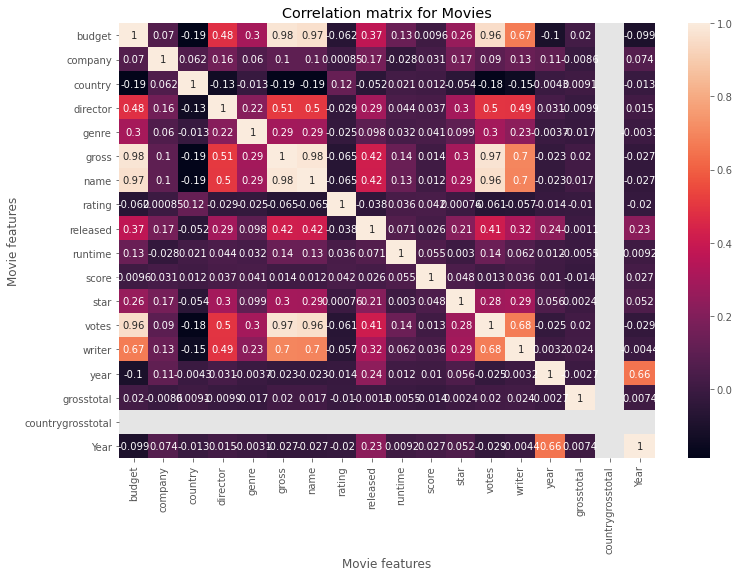

In [189]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [73]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

budget  budget      1.000000
        company     0.070302
        country    -0.189282
        director    0.480919
        genre       0.300018
                      ...   
year    score       0.010438
        star        0.055951
        votes      -0.025407
        writer      0.003199
        year        1.000000
Length: 225, dtype: float64


In [74]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country   budget     -0.189282
budget    country    -0.189282
country   gross      -0.187801
gross     country    -0.187801
country   name       -0.187762
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 225, dtype: float64


In [75]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director  name        0.504802
name      director    0.504802
gross     director    0.507853
director  gross       0.507853
budget    writer      0.674068
writer    budget      0.674068
          votes       0.677493
votes     writer      0.677493
name      writer      0.695995
writer    name        0.695995
gross     writer      0.700464
writer    gross       0.700464
budget    votes       0.955916
votes     budget      0.955916
name      votes       0.960618
votes     name        0.960618
budget    name        0.965431
name      budget      0.965431
votes     gross       0.974594
gross     votes       0.974594
budget    gross       0.978268
gross     budget      0.978268
          name        0.984267
name      gross       0.984267
budget    budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross   

In [130]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

In [139]:
df['Year'] = df['released'].astype(str).str[:4]
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,Les Productions du Tr�sor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,NaN,NaN,2017
1871,0.0,Paramount Pictures,USA,Richard Benjamin,Comedy,18137661.0,Milk Money,PG-13,1994-08-31,110,5.5,Melanie Griffith,9880,John Mattson,1994,NaN,NaN,1994
1852,0.0,Twentieth Century Fox Film Corporation,USA,Les Mayfield,Family,17193886.0,Miracle on 34th Street,PG,1994-11-18,114,6.4,Richard Attenborough,24126,Valentine Davies,1994,NaN,NaN,1994
1854,0.0,Morgan Creek Productions,USA,Dennis Hopper,Comedy,1596700.0,Chasers,R,1994-04-22,102,5.0,Tom Berenger,4804,Joe Batteer,1994,NaN,NaN,1994
1855,0.0,Renn Productions,France,Patrice Ch�reau,Biography,2017346.0,Queen Margot,R,1994-12-09,159,7.5,Isabelle Adjani,14377,Alexandre Dumas,1994,NaN,NaN,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,Marvel Studios,USA,Joss Whedon,Action,459005868.0,Avengers: Age of Ultron,PG-13,2015-05-01,141,7.4,Robert Downey Jr.,537832,Joss Whedon,2015,NaN,NaN,2015
6194,250000000.0,New Line Cinema,New Zealand,Peter Jackson,Adventure,255119788.0,The Hobbit: The Battle of the Five Armies,PG-13,2014-12-17,144,7.4,Ian McKellen,396797,Fran Walsh,2014,NaN,NaN,2014
4637,258000000.0,Columbia Pictures,USA,Sam Raimi,Action,336530303.0,Spider-Man 3,PG-13,2007-05-04,139,6.2,Tobey Maguire,416842,Sam Raimi,2007,NaN,NaN,2007
5293,260000000.0,Walt Disney Animation Studios,USA,Nathan Greno,Animation,200821936.0,Tangled,PG,2010-11-24,100,7.8,Mandy Moore,325621,Dan Fogelman,2010,NaN,NaN,2010


In [140]:
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,26183197.0
1+2 Seisaku Iinkai,2000,1136776.0
101st Street Films,1998,306715.0
10th Hole Productions,2010,103280.0
120 Films,2002,753501.0
...,...,...
Zucker Brothers Productions,1998,6940185.0
double A Films,2000,1568749.0
erbp,2013,444098.0


In [153]:

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                                 year
Paramount Pictures                      2011    1486604229
Universal Pictures                      2015    1411831667
Warner Bros.                            2008    1327598616
                                        2010    1255477478
                                        2011    1217527619
                                        2005    1175793638
Twentieth Century Fox Film Corporation  2009    1173191407
Warner Bros.                            2006    1154792759
                                        2009    1146640373
Walt Disney Pictures                    2010    1134883375
Columbia Pictures                       2011    1072753462
Universal Pictures                      2013    1066421491
Warner Bros.                            2014    1062468828
Universal Pictures                      2007    1057955786
Columbia Pictures                       2012    1020616938
Name: gross, dtype: int64

In [179]:

CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

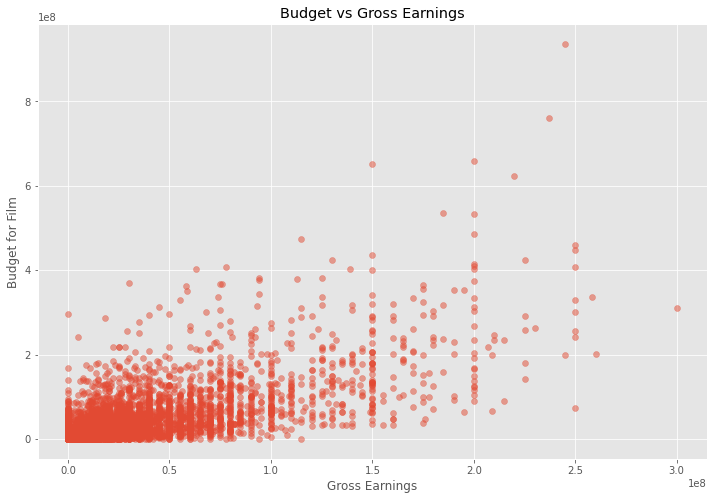

In [184]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [199]:
df


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,1393,16,1918,6,37757.0,1971,8,2398,120,6.7,1558,2411,2831,2016,NaN,NaN,31
1871,0.0,1680,54,2145,4,18137661.0,3332,7,667,110,5.5,1633,9880,1993,1994,NaN,NaN,8
1852,0.0,2062,54,1564,7,17193886.0,3346,6,687,114,6.4,1968,24126,4034,1994,NaN,NaN,8
1854,0.0,1544,54,645,4,1596700.0,1031,8,636,102,5.0,2342,4804,1885,1994,NaN,NaN,8
1855,0.0,1811,16,1968,3,2017346.0,4026,8,691,159,7.5,925,14377,123,1994,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,1491,54,1412,0,459005868.0,502,7,2239,141,7.4,2001,537832,2145,2015,NaN,NaN,29
6194,250000000.0,1582,34,2045,1,255119788.0,5420,7,2207,144,7.4,911,396797,1231,2014,NaN,NaN,28
4637,258000000.0,664,54,2317,0,336530303.0,4632,7,1615,139,6.2,2334,416842,3541,2007,NaN,NaN,21
5293,260000000.0,2119,54,1882,2,200821936.0,4877,6,1876,100,7.8,1536,325621,749,2010,NaN,NaN,24


<AxesSubplot:xlabel='rating', ylabel='gross'>

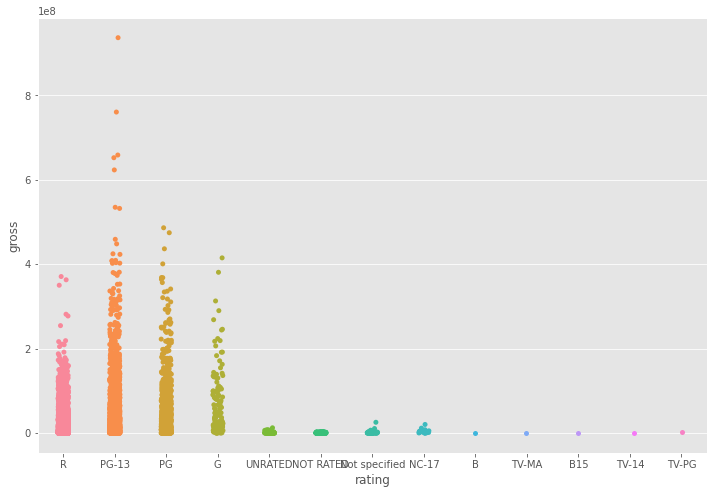

In [177]:
sns.stripplot(x="rating", y="gross", data=df)